# Part I - 2019-Ford Go Bike Dataset Analysis and Visualization
## by Suleiman Mohamed 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#pre">Preliminary Wrangling</a></li>
<li><a href="#uni">Univariate Exploration</a></li>
<li><a href="#bi">Bivariate Exploration</a></li>
<li><a href="#multi">Multivariate Exploration</a></li>
<li><a href="#conc">Conclusions</a></li>
</ul>







<a id='intro'></a>
## Introduction
> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. The dataset contains 183412 entries with 16 columns.




<a id='pre'></a>
## Preliminary Wrangling
### Data assessment and cleaning
> We will import all of the essential packages for the dataset in the sections below.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> We will Load in our dataset and assess it's properties.


In [2]:
# load the dataset
ford_df= pd.read_csv('201902-fordgobike-tripdata.csv')

#### Assessment

In [3]:
# assessing the dataset visually
ford_df.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
# assessing the dataset visually at a shuffle
ford_df.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
163213,456,2019-02-05 09:31:43.8750,2019-02-05 09:39:20.1940,19.0,Post St at Kearny St,37.788975,-122.403452,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,5451,Subscriber,1971.0,Male,No
142972,293,2019-02-07 16:28:44.2750,2019-02-07 16:33:37.7320,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,164.0,Isabella St at San Pablo Ave,37.814988,-122.274844,5510,Subscriber,1990.0,Male,No
135156,196,2019-02-08 15:20:43.6390,2019-02-08 15:23:59.7430,266.0,Parker St at Fulton St,37.862464,-122.264791,267.0,Derby St at College Ave,37.861804,-122.253569,4782,Subscriber,1998.0,Male,No
130967,424,2019-02-09 14:34:14.1630,2019-02-09 14:41:18.6670,119.0,18th St at Noe St,37.761047,-122.432642,97.0,14th St at Mission St,37.768265,-122.420110,5010,Subscriber,1987.0,Male,No
142457,307,2019-02-07 17:08:43.5860,2019-02-07 17:13:50.8900,243.0,Bancroft Way at College Ave,37.869360,-122.254337,249.0,Russell St at College Ave,37.858473,-122.253253,1752,Subscriber,1991.0,Female,No


In [5]:
#assessing all the different quantifiable values for the numeric values in the dataset
ford_df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [6]:
# assessing all the necessary information of the dataset
ford_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


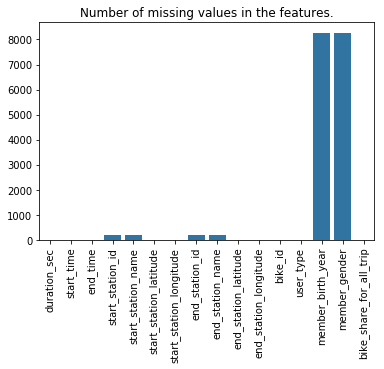

In [7]:
# plotting a bargraph to show if there are any missing data in the dataset
na_counts = ford_df.isna().sum()
base_color = sb.color_palette()[0]
sb.barplot(na_counts.index.values, na_counts, color = base_color)
plt.xticks(rotation=90);
plt.title('Number of missing values in the features.');

In [8]:
# checks for any duplicated values, for no duplicated value it should return 0.
ford_df.duplicated().sum()

0

After assessing the data above, I've noticed the following;

### Quality issues

1) start time and end time are objects change to timestamps.

2) user type, gender and bike_share_for_all_trip change to category.

3) bike_id, start_station_id, end_station_id can be set as object.

4) compute the user's age.

5) To further examine the dataset, obtain the month, day, hour, and weekday columns.

6) Missing values.

7) Add member_age_group column to the dataset.

### Making copies

In [9]:
#create copy of original dataframe
ford_new_df = ford_df.copy()

### Cleaning the dataset

#### Define

>Convert the datatypes of 'start_time' and 'end_time' to timestamps.

#### Code

In [10]:
#Convert the datatypes of 'start_time' and 'end_time' to timestamps.
ford_new_df['start_time'] = pd.to_datetime(ford_new_df['start_time'])
ford_new_df['end_time'] = pd.to_datetime(ford_new_df['end_time'])

#### Test

In [11]:
#checks the changes
ford_new_df.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                          object
member_birth_year                 float64
member_gender                      object
bike_share_for_all_trip            object
dtype: object

#### Define
>bike_id, start_station_id, end_station_id to object.

#### Code

In [12]:
# set bike id, start_station_id, end_station_id to object
ford_new_df.bike_id = ford_new_df.bike_id.astype(str)
ford_new_df.start_station_id = ford_new_df.bike_id.astype(str)
ford_new_df.end_station_id = ford_new_df.bike_id.astype(str)

#### Test

In [13]:
#checks the changes
ford_new_df.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                   object
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                     object
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                            object
user_type                          object
member_birth_year                 float64
member_gender                      object
bike_share_for_all_trip            object
dtype: object

#### Define
compute the user's age.

#### Code

In [14]:
# substract the member_birth_year from the current year=2022
ford_new_df['member_age'] = 2022-ford_new_df['member_birth_year']

#### Test

In [15]:
#confirms the changes
ford_new_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,4902,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,4902,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,38.0
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,2535,The Embarcadero at Steuart St,37.791464,-122.391034,2535,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,NaN
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,5905,Market St at Dolores St,37.769305,-122.426826,5905,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,50.0
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,6638,Grove St at Masonic Ave,37.774836,-122.446546,6638,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,33.0
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,4898,Frank H Ogawa Plaza,37.804562,-122.271738,4898,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,48.0


#### Define
To further examine the dataset, obtain the month, day, hour, and weekday columns.

#### Code

In [16]:
# extract month name from start_time column 
ford_new_df['start_month_name']=ford_new_df['start_time'].dt.strftime('%B')
ford_new_df['end_month_name']=ford_new_df['end_time'].dt.strftime('%B')

In [17]:
# extract month number from start_time column
ford_new_df['start_month']=ford_new_df['start_time'].dt.month.astype(int)
ford_new_df['end_month']=ford_new_df['end_time'].dt.month.astype(int)

In [18]:
# extract weekdays from start_time column
ford_new_df['start_weekday']=ford_new_df['start_time'].dt.strftime('%a')
ford_new_df['end_weekday']=ford_new_df['end_time'].dt.strftime('%a')

In [19]:
# extract day from start_time column
ford_new_df['start_day']=ford_new_df['start_time'].dt.day.astype(int)
ford_new_df['end_day']=ford_new_df['end_time'].dt.day.astype(int)

In [20]:
# extract hour from start_time column
ford_new_df['start_time_hour']=ford_new_df['start_time'].dt.hour
ford_new_df['end_time_hour']=ford_new_df['end_time'].dt.hour

####  Test

In [21]:
#confirms the changes
ford_new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 27 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null datetime64[ns]
end_time                   183412 non-null datetime64[ns]
start_station_id           183412 non-null object
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183412 non-null object
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null object
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
member_age                 175147 non-null float64
start_month_name  

In [22]:
#confirms the changes
ford_new_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,start_month_name,end_month_name,start_month,end_month,start_weekday,end_weekday,start_day,end_day,start_time_hour,end_time_hour
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,4902,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,4902,Commercial St at Montgomery St,37.794231,...,February,March,2,3,Thu,Fri,28,1,17,8
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,2535,The Embarcadero at Steuart St,37.791464,-122.391034,2535,Berry St at 4th St,37.775880,...,February,March,2,3,Thu,Fri,28,1,18,6
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,5905,Market St at Dolores St,37.769305,-122.426826,5905,Powell St BART Station (Market St at 4th St),37.786375,...,February,March,2,3,Thu,Fri,28,1,12,5
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,6638,Grove St at Masonic Ave,37.774836,-122.446546,6638,Central Ave at Fell St,37.773311,...,February,March,2,3,Thu,Fri,28,1,17,4
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,4898,Frank H Ogawa Plaza,37.804562,-122.271738,4898,10th Ave at E 15th St,37.792714,...,February,March,2,3,Thu,Fri,28,1,23,0


#### Define
>change user type, gender and bike_share_for_all_trip to category.

#### Code

In [23]:
# set user type, gender and bike_share_for_all_trip to category
ford_new_df.user_type = ford_new_df.user_type.astype('category')
ford_new_df.member_gender = ford_new_df.member_gender.astype('category')
ford_new_df.bike_share_for_all_trip = ford_new_df.bike_share_for_all_trip.astype('category')

#### Test

In [24]:
#confirms the changes
ford_new_df.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                   object
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                     object
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                            object
user_type                        category
member_birth_year                 float64
member_gender                    category
bike_share_for_all_trip          category
member_age                        float64
start_month_name                   object
end_month_name                     object
start_month                         int64
end_month                           int64
start_weekday                      object
end_weekday                        object
start_day                         

#### Define
Add member_age_group column to the dataset

#### Code

In [25]:
# creates member_age_group column that categorizes the ages
ford_new_df['member_age_group'] = ford_new_df['member_age'].apply(lambda x: '10 - 20' if 10<x<=20
                                                  else '20 - 30' if 20<x<=30
                                                  else '30 - 40' if 30<x<=40
                                                  else '40 - 50' if 40<x<=50
                                                  else '50 - 60' if 50<x<=60
                                                  else '60 - 70' if 60<x<=70
                                                  else '70 - 80' if 70<x<=80
                                                  else '80 - 90' if 80<x<=90
                                                  else '90 - 100' if 90<x<=100
                                                  else '100 - 110' if 100<x<=110
                                                  else '110 - 120' if 110<x<=120
                                                  else '120 - 130' if 120<x<=130
                                                  else '130 - 140' if 130<x<=140
                                                  else '140 - 150' if 140<x<=150
                                                  else x)

#### Test

In [26]:
#confirms the addition of a column
ford_new_df['member_age_group'].value_counts()

30 - 40      76889
20 - 30      48227
40 - 50      30247
50 - 60      14002
60 - 70       4750
70 - 80        820
90 - 100        92
120 - 130       59
80 - 90         45
110 - 120       12
100 - 110        3
140 - 150        1
Name: member_age_group, dtype: int64

#### Define
>Missing values.

#### Code

In [27]:
#Dropping missing values
ford_new_df = ford_new_df.dropna()

#### Test

In [28]:
# To prove the code works it should return 0.
ford_new_df.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
member_age                 0
start_month_name           0
end_month_name             0
start_month                0
end_month                  0
start_weekday              0
end_weekday                0
start_day                  0
end_day                    0
start_time_hour            0
end_time_hour              0
member_age_group           0
dtype: int64

In [29]:
#confirms the changes
ford_new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 28 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null object
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null object
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null object
user_type                  174952 non-null category
member_birth_year          174952 non-null float64
member_gender              174952 non-null category
bike_share_for_all_trip    174952 non-null category
member_age                 174952 non-null float64
start_month_

### What is the structure of your dataset?

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. The dataset contains 183412 entries with 16 columns.

<table>
  <thead>
    <tr>
      <th>Variable Name</th>
      <th>Definition</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>duration_sec</td>
      <td>int64</td>
    </tr>
    <tr>
      <td>start_time</td>
      <td>object</td>
    </tr>
    <tr>
      <td>end_time</td>
      <td>object</td>
    </tr>
    <tr>
      <td>start_station_id</td>
      <td>float64</td>
    </tr>
    <tr>
      <td>start_station_name</td>
      <td>object</td>
    </tr>
    <tr>
      <td>start_station_latitude</td>
      <td>float64</td>
    </tr>
    <tr>
      <td>start_station_longitude</td>
      <td>float64</td>
    </tr>
    <tr>
      <td>end_station_id</td>
      <td>float64</td>
    </tr>
    <tr>
      <td>end_station_name</td>
      <td>object</td>
    </tr>
    <tr>
      <td>end_station_latitude</td>
      <td>float64</td>
    </tr>
    <tr>
      <td>end_station_longitude</td>
      <td>float64</td>
    </tr>
    <tr>
      <td>bike_id</td>
      <td>int64</td>
    </tr>
    <tr>
      <td>user_type</td>
      <td>object</td>
    </tr>
    <tr>
      <td>member_birth_year</td>
      <td>float64</td>
    </tr>
    <tr>
      <td>member_gender</td>
      <td>object</td>
    </tr>
    <tr>
      <td>bike_share_for_all_trip</td>
      <td>object</td>
    </tr>
  </tbody>
</table>

### What is/are the main feature(s) of interest in your dataset?

> I'm mostly interested in determining which variables in the dataset are most helpful at predicting the number of bike rides.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I anticipate that the start time from the dataset will be heavily utilised in my research, along with user-related data such as age, gender, and user type. I anticipate that bike time, such as hour, day, weekday, will have the most impact on bike demand.

<a id='uni'></a>
## Univariate Exploration



## 1. What gender rides bikes the most?

In [30]:
#set the function for the title,x-axis and y-axis to avoid duplication code
def x_y_t(xL,yL,title):
    """
    This function plots on parameters passed in:
    xL (String): is the Label on the x-axis
    yL (String): is the Label on the y-axis
    title (String): is the Title of the plot
    """
    plt.xlabel(xL)
    plt.ylabel(yL)
    plt.title(title)
    

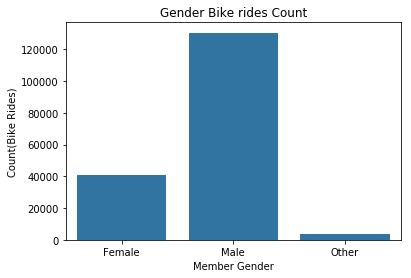

In [31]:
# countplot for Gender Bike rides Count
sb.countplot(data = ford_new_df, x = 'member_gender', color=base_color);
x_y_t('Member Gender','Count(Bike Rides)','Gender Bike rides Count')   

The graph above shows that `Males` ride bikes the most (over 120,000 counts), followed by `Females` (about 40,000 counts). `Others` received a count of fewer than 10,000.

## 2. Which time of day is the busiest?

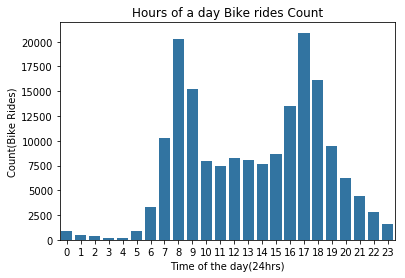

In [32]:
#countplot graph for hours of a day Bike rides Count
sb.countplot(data = ford_new_df, x = 'start_time_hour', color=base_color);
x_y_t('Time of the day(24hrs)','Count(Bike Rides)','Hours of a day Bike rides Count')

The graph above shows that it is mostly busy between 8 a.m. and 5 p.m. While the average is between 8 a.m. and 5 p.m., there is a decline after 5 p.m. until 4 a.m., when it begins to increase until 8 a.m.

## 3. Which user type rides the most bikes?

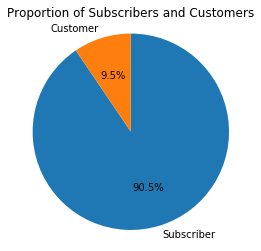

In [33]:
#piechart to describe the proportion of subscribers and customers.
sorted_counts = ford_new_df['user_type'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False,autopct='%.1f%%');
plt.axis('square');
plt.title('Proportion of Subscribers and Customers');

According to the graph above, subscribers ride 90.5% of the bikes compared to customers who ride 9.5% of the bikes.

## 4. Which day of the week is the busiest?

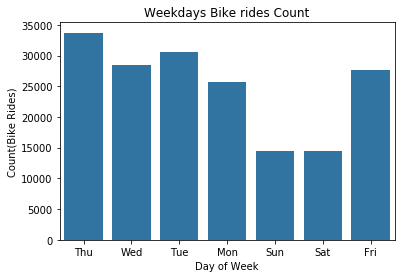

In [34]:
#countplot graph for Weekdays Bike rides Count 
sb.countplot(data = ford_new_df, x = 'start_weekday', color=base_color);
x_y_t('Day of Week','Count(Bike Rides)','Weekdays Bike rides Count')

The days of the week are not ordered in the same order from the first to the last day.
This needs to be rearranged correctly.

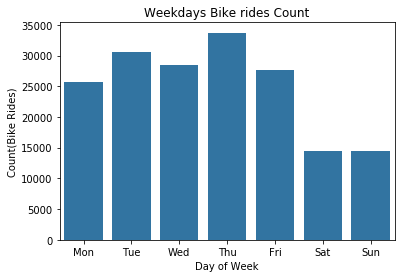

In [35]:
#We need to arrange the x-axis to be orderly
#we will need to introduce list then intergrate it into the countpot
week_days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
week_category = pd.api.types.CategoricalDtype(ordered=True, categories=week_days)
ford_new_df['start_weekday'] = ford_new_df['start_weekday'].astype(week_category)
sb.countplot(data=ford_new_df, x='start_weekday', color=base_color);
x_y_t('Day of Week','Count(Bike Rides)','Weekdays Bike rides Count')

The graph above shows that Thursday is the busiest day. The number of rides on weekdays exceeds 25,000, which is higher than the number of rides on weekends, which is around 15,000 in number.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> We had to change the scale to fit our distribution when analyzing the duration time of bike rides per user type and the total number of bike rides for user type with age classes. For the piechart of user type counts, we had set the startangle to 90. The other distributions fit the charts well.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> For better display and distribution, I cleaned up the dataset's characteristics. I altered the datatype of the extracted week, hour, and time from the provided Start time. I adjusted the period from seconds to hours for better visualization. I also removed several values that were missing. I converted the start and end times from objects to timestamps. I added categories for user type, gender, and bike share for all trip. I assigned the objects bike id, start station id, and end station id. I determined the user's age. The dataset now includes a member age group column that categorizes the ages.

<a id='bi'></a>
## Bivariate Exploration


## 1. What is the user type trend for the number of bike rides in a day?

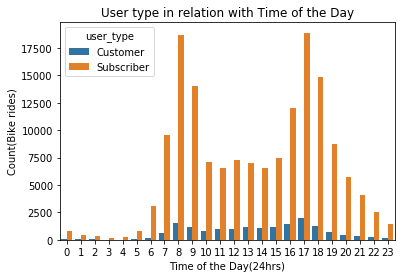

In [36]:
#we will create a countplot graph for User type in relation with Time of the Day
sb.countplot(data=ford_new_df, x='start_time_hour', hue='user_type');
x_y_t('Time of the Day(24hrs)','Count(Bike rides)','User type in relation with Time of the Day')

The gap between subscriber and customer is wide, but the graph is lacking in finer detail.

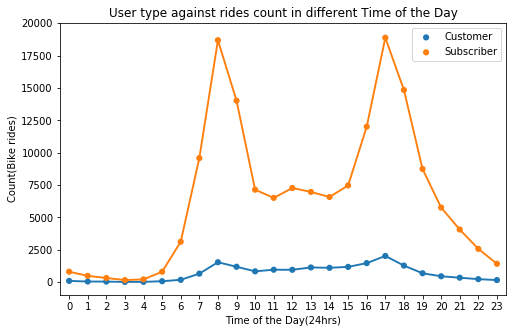

In [37]:
#countplot graph for User type against Bike rides count in different Time of the Day
user_type_count = ford_new_df.groupby(["start_time_hour", "user_type"]).size().reset_index()
plt.figure(figsize=(8,5))
axis = sb.pointplot(x='start_time_hour', y=0, hue='user_type', scale=.7, data=user_type_count)
plt.legend();
x_y_t('Time of the Day(24hrs)','Count(Bike rides)','User type against rides count in different Time of the Day')

The customer and subscriber graph trend is highest at 8 a.m. and 5 p.m., decreases from 5 p.m., and increases at 4 a.m. The subscriber trend falls rapidly after 5 p.m. and rises rapidly from 4 a.m., with a large gap between the average and the highest peak. For the customer, the trend is near to the average and maximum points, with relatively gradual reduction and growth.

## 2. What is the user type trend in terms of weekly bike rides?

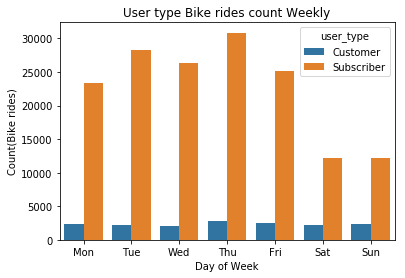

In [38]:
# countplot graph for User type Bike rides count Weekly
sb.countplot(data=ford_new_df, x='start_weekday', hue='user_type');
x_y_t('Day of Week','Count(Bike rides)','User type Bike rides count Weekly')

When compared to the customer trend, the subscriber trend may be plainly interpreted.

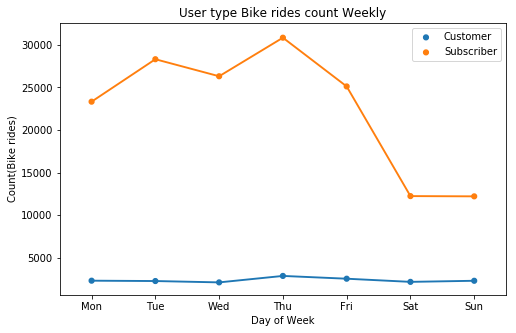

In [39]:
# pointplot graph for User type Bike rides count Weekly
user_count = ford_new_df.groupby(["start_weekday", "user_type"]).size().reset_index()
plt.figure(figsize=(8,5))
axis = sb.pointplot(x='start_weekday', y=0, hue='user_type', scale=.7, data=user_count)
plt.legend();
x_y_t('Day of Week','Count(Bike rides)','User type Bike rides count Weekly')

We can observe the trends more clearly now than previously. The consumer trend is more consistent throughout the week, with a modest increase on Thursday. While the subscriber trend climbs at the start of the week and begins to dip after reaching its peak on Thursday, it remains consistent during the weekend.

## 3. What is the weekly distribution of Gender type rides count?

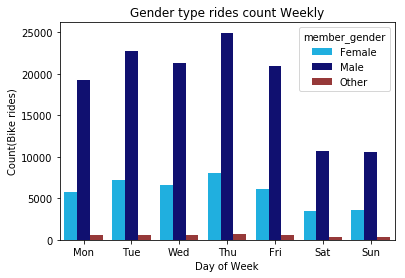

In [40]:
#countplot graph for Gender type rides count Weekly 
my_palette = {'Female': 'deepskyblue', 'Male': 'navy', 'Other': 'brown'}
sb.countplot(data=ford_new_df, x='start_weekday', hue='member_gender', palette=my_palette);
x_y_t('Day of Week','Count(Bike rides)','Gender type rides count Weekly')

The graph above clearly illustrates that the male gender uses the rides the most compared to the other genders weekly, with all genders having the highest count on Thursday. The gender distribution varies during the week, but remains constant on weekends.

## 4. How does the distribution of User type ride counts differ between age groups?

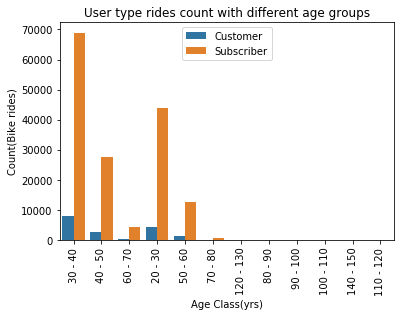

In [41]:
# countplot graph for User type rides count with different age groups
sb.countplot(data=ford_new_df, x='member_age_group', hue='user_type');
plt.xticks(rotation=90);
plt.legend();
x_y_t('Age Class(yrs)','Count(Bike rides)','User type rides count with different age groups')

The graph above illustrates that the age group 30-40yrs has more user types than the other age groups. The age group 60-70 has the fewest customers, while the age group 70-80 has the fewest subscribers. There are no user types for the age groups 80-90, 90-100, 100-110, 110-120, 120-130, and 140-150. There are no customers between the ages of 70 and 80.

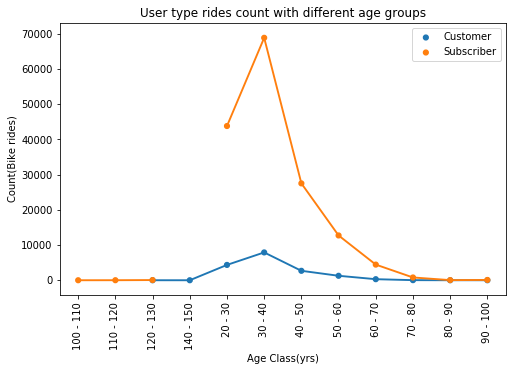

In [42]:
# pointplot graph for User type rides count with different age groups
user_type_count = ford_new_df.groupby(["member_age_group", "user_type"]).size().reset_index()
plt.figure(figsize=(8,5))
axis = sb.pointplot(x='member_age_group', y=0, hue='user_type', scale=.7, data=user_type_count)
plt.legend();
plt.xticks(rotation=90);
x_y_t('Age Class(yrs)','Count(Bike rides)','User type rides count with different age groups')


It summarizes how the distribution of User type ride counts differs between age groups by emphasizing the factors mentioned above this graph.

## 5. How does bike sharing differ by user type?

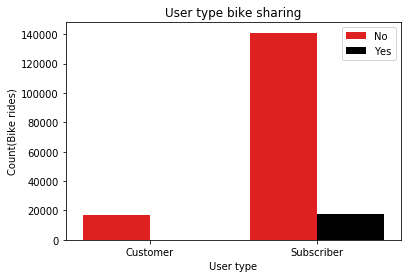

In [43]:
#Described the color for different options
#creates countplot graph for User type bike sharing
color = {'No':'red', 'Yes':'black'}
sb.countplot(data=ford_new_df, x='user_type', hue='bike_share_for_all_trip', palette=color);
plt.legend();
x_y_t('User type','Count(Bike rides)','User type bike sharing')

In the graph above, the customer did not share their ride, and while many subscribers did not share their journeys, there were a handful who did.

## 6. How is the bike count shared for all rides per hour of the day?

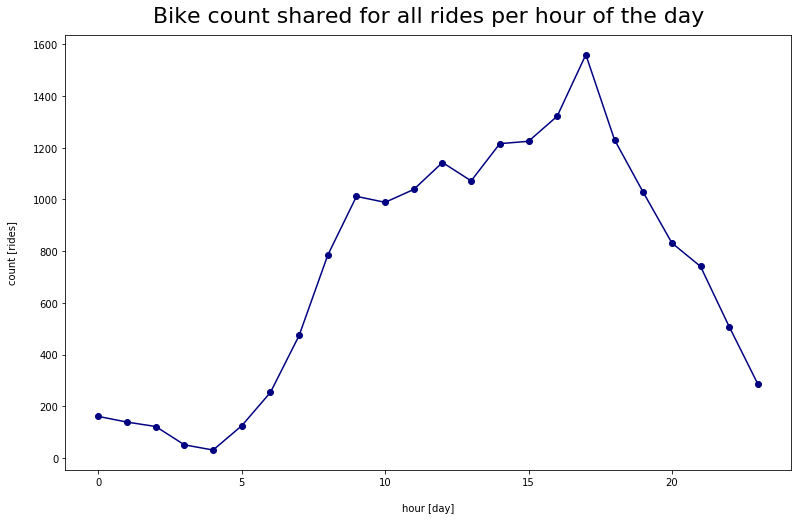

In [44]:
#creates pointplot graph for Bike count shared for all rides per hour of the day
ford_new_df[ford_new_df['bike_share_for_all_trip']=='Yes'].groupby('start_time_hour').agg({'bike_id':'count'}).plot(style='-o', figsize=(13,8), color='navy', legend=False);
plt.title("Bike count shared for all rides per hour of the day", fontsize=22, y=1.015);
plt.xlabel('hour [day]', labelpad=16);
plt.ylabel('count [rides]', labelpad=16);

The trend climbs as the day begins, peaks between 20 and 15 hours, and then lowers to the end of the day.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

>  Subscribers outnumber Customers in terms of usage. The peak times are 8 a.m. and 5 p.m., with Thursday being the busiest day. Males use rides the most in comparison to the other genders. Users between the ages of 30 and 40 ride the most.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The interactions between features all complement each other and make sense when viewed together; there is no major surprise observed.

<a id='multi'></a>
## Multivariate Exploration



## 1. How is the Weekly Hourly Usage for Customers and Subscribers?

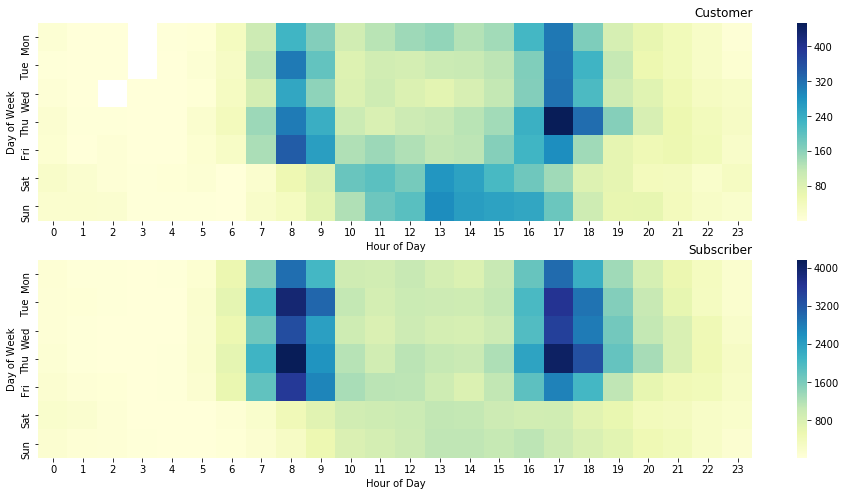

In [45]:
#creates a heatmap graph of Hourly Usage Weekly for Customers and Subscribers
plt.suptitle('Hourly Usage Weekly for Customers and Subscribers')

#creating a heatmap graph of Hourly Usage Weekly for Customers 
plt.figure(figsize = (16,8))
plt.subplot(2, 1, 1)
customers = ford_new_df.query('user_type == "Customer"')
ct_counts = customers.groupby(['start_weekday', 'start_time_hour']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='start_weekday', columns='start_time_hour', values='count')
sb.heatmap(ct_counts, cmap='YlGnBu');
plt.title('Customer', loc='right');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');

#creating a heatmap graph of Hourly Usage Weekly for Subscribers
plt.subplot(2, 1, 2)
subscribers = ford_new_df.query('user_type == "Subscriber"')
st_counts = subscribers.groupby(['start_weekday', 'start_time_hour']).size()
st_counts = st_counts.reset_index(name='count')
st_counts = st_counts.pivot(index='start_weekday', columns='start_time_hour', values='count')
sb.heatmap(st_counts, cmap='YlGnBu');
plt.title('Subscriber', loc='right');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');

The accompanying heat map clearly shows the Weekly Hourly Usage for Customer and Subscriber.

## 2. How does the Weekly Hourly usage compare between Male and Female?

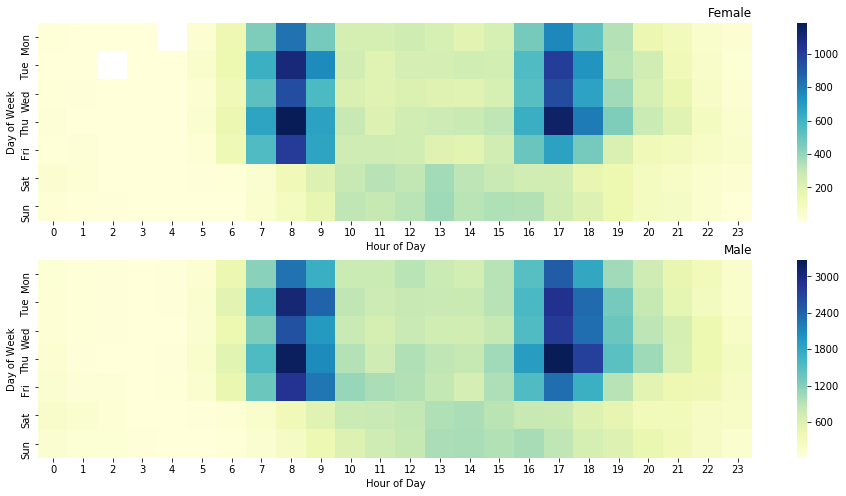

In [46]:
#creating a heatmap graph of Hourly Usage during Weekdays for Female and Male
plt.suptitle('Hourly Usage during Weekdays for Female and Male') 

#creating a heatmap graph of Hourly Usage Weekly for Female
plt.figure(figsize = (16,8))
plt.subplot(2, 1, 1)
customers = ford_new_df.query('member_gender == "Female"')
ct_counts = customers.groupby(['start_weekday', 'start_time_hour']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='start_weekday', columns='start_time_hour', values='count')
sb.heatmap(ct_counts, cmap='YlGnBu');
plt.title('Female', loc='right');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');

#creating a heatmap graph of Hourly Usage Weekly for Male
plt.subplot(2, 1, 2)
subscribers = ford_new_df.query('member_gender == "Male"')
st_counts = subscribers.groupby(['start_weekday', 'start_time_hour']).size()
st_counts = st_counts.reset_index(name='count')
st_counts = st_counts.pivot(index='start_weekday', columns='start_time_hour', values='count')
sb.heatmap(st_counts, cmap='YlGnBu');
plt.title('Male', loc='right');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');


The accompanying heat map clearly shows the Weekly Hourly Usage for Female and Male.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The link between the many variables plotted is seen and information is supplied. Subscribers' short period of usage corresponds to their heavy concentration on rush hours Monday through Friday. The customer usage is similar to subscriber usage, however it is higher at 5 p.m.

> The link between the many variables plotted is seen and information is supplied. The brief time of utilization for females closely corresponds to male activities between Monday and Sunday. 

### Were there any interesting or surprising interactions between features?

> The interactions between features all complement each other and make sense when viewed together; there is no major surprise observed.

<a id='conc'></a>
## Conclusions
>I cleaned up the dataset's properties for better display. From the  Start time, I extracted the week, hour, and time. I changed the time span from seconds to hours. In addition, I removed several missing values. I transformed the starting and ending times to timestamps. I added categories to several columns. I calculated the user's age and then classified them into age groups.

>In terms of usage, Subscribers outnumber Customers. The busiest day is Thursday, with peak times at 8 a.m. and 5 p.m. Males ride the most in comparison to the other genders. The majority of users are between the ages of 30 and 40.
Monday through Friday at rush hours, subscriber usage is at its peak. Customer usage is similar to subscriber usage, however it is higher at 5 p.m.


In [47]:
# Converting to html document. It should return 0 if successful
from subprocess import call
call(['python', '-m', 'nbconvert', 'Part_I_exploration_template.ipynb'])

0